In [2]:
import matplotlib.pyplot as plt
from random import randint
import copy
import math

In [3]:

class Line:
  def __init__(self, start: tuple, end: tuple) -> None:
    self.start = start
    self.end = end

  def __len__(self) -> int:
    return (self.end[0] - self.start[0]) +  (self.end[1] - self.start[1])

  def __hash__(self):
    return hash(self.start) ^ hash(self.end)

  def __eq__(self, other):
    return self.start[0] == other.start[0] and \
      self.start[1] == other.start[1] and \
      self.end[0] == other.end[0] and \
      self.end[1] == other.end[1]

Player 1 score: 0
Player 2 score: 0


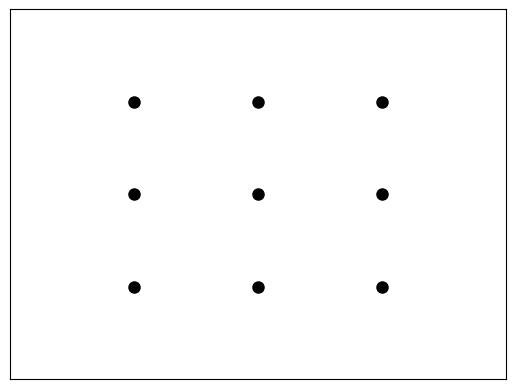

In [4]:

class Dots_and_Boxes:

  def __init__(self, num_rows=2, num_cols=2):
    self.num_rows = num_rows
    self.num_cols = num_cols
    self.p1_lines = set()
    self.p2_lines = set()
    self.max = 4*sum(list(range(1, num_rows+1)))

  def draw_dots_and_boxes(self):
      fig, ax = plt.subplots()
      for i in range(self.num_rows + 1):
          for j in range(self.num_cols + 1):
              ax.plot(j, i, 'ko', markersize=8)

      # # Plot Player 1 Lines in Blue
      for line in self.p1_lines:
        ax.plot([line.start[0], line.end[0]],
         [line.start[1], line.end[1]], c='blue')

      # # Plot Player 2 Lines in Blue
      for line in self.p2_lines:
        ax.plot([line.start[0], line.end[0]],
         [line.start[1], line.end[1]], c='red')

      # Set axis limits and remove ticks
      ax.set_xlim(-1, self.num_cols + 1)
      ax.set_ylim(-1, self.num_rows + 1)
      ax.set_xticks([])
      ax.set_yticks([])

      # Show the plot
      plt.show()

  def p1_place(self, m: Line) -> None:
    assert len(m) == 1, "Line is too long or too short"
    assert m not in self.p1_lines and m not in self.p2_lines, "Move already played"
    self.p1_lines.add(m)

  def p2_place(self, m: Line) -> None:
    assert len(m) == 1, "Line is too long or too short"
    assert m not in self.p1_lines and m not in self.p2_lines, "Move already played"
    self.p2_lines.add(m)

  def print_p1_score(self) -> None:
    score = 0
    for row in range(self.num_rows):
      for col in range(self.num_cols):
        if Line((row, col), (row, col+1)) in self.p1_lines and \
          Line((row+1, col), (row+1, col+1)) in self.p1_lines and \
          Line((row, col), (row+1, col)) in self.p1_lines and \
          Line((row, col+1), (row+1, col+1)) in self.p1_lines:
            score += 1
    print(f'Player 1 score: {score}')

  def print_p2_score(self) -> None:
    score = 0
    for row in range(self.num_rows):
      for col in range(self.num_cols):
        if Line((row, col), (row, col+1)) in self.p2_lines and \
          Line((row+1, col), (row+1, col+1)) in self.p2_lines and \
          Line((row, col), (row+1, col)) in self.p2_lines and \
          Line((row, col+1), (row+1, col+1)) in self.p2_lines:
            score += 1
    print(f'Player 2 score: {score}')

  def is_full(self):
    return len(self.p1_lines) + len(self.p2_lines) >= self.max

# Example usage: 3x3 Dots and Boxes board
board = Dots_and_Boxes(2, 2)
board.print_p1_score()
board.print_p2_score()
board.draw_dots_and_boxes()
del board

In [5]:
# FILL IN THIS SECTION

def evaluate(b: Dots_and_Boxes) -> float:


  total_boxes = b.num_rows * b.num_cols
  return .50 * p2_score(b) + .20 * (total_boxes - p1_score(b)) + .30 * number_of_p2_lines_not_on_edge(b)


def number_of_p2_lines_not_on_edge(b: Dots_and_Boxes):
  top_edge = b.num_rows
  bottom_edge = 0
  left_edge = 0
  right_edge = b.num_cols
  total = 0
  edge_list = set()
  lines_found = set()
  for row in range(0, b.num_rows+1):
    for col in range(0, b.num_cols+1):
      if col == left_edge or col == right_edge or row == bottom_edge or row == top_edge:
        edge_list.add((col, row))
  for row in range(0, b.num_rows):
    for col in range(0, b.num_cols):
      if Line((col, row), (col+1, row)) in b.p2_lines and ((col, row) not in edge_list or (col+1, row) not in edge_list) and (col, row, col+1, row) not in lines_found:
        lines_found.add((col, row, col+1, row))
        total += 1
      if Line((col, row+1), (col+1, row+1)) in b.p2_lines and ((col, row+1) not in edge_list or (col+1, row+1) not in edge_list) and (col, row+1, col+1, row+1) not in lines_found:
        lines_found.add((col, row+1, col+1, row+1))
        total += 1
      if Line((col, row), (col, row+1)) in b.p2_lines and ((col, row) not in edge_list or (col, row+1) not in edge_list) and (col, row, col, row+1) not in lines_found:
        lines_found.add((col, row, col, row+1))
        total += 1
      if Line((col+1, row), (col+1, row+1)) in b.p2_lines and ((col+1, row) not in edge_list or (col+1, row+1) not in edge_list) and (col+1, row, col+1, row+1) not in lines_found:
        lines_found.add((col+1, row, col+1, row+1))
        total += 1
  return total



def p1_bottom_horizontal_line_check(b, col, row):
  if Line((col, row), (col+1, row)) in b.p1_lines:
    return 1
  # elif Line((col, row), (col+1, row)) in b.p2_lines:
  #   return 5 # return 5 because a p2 line does not make the box uncontested
  else: return 0
def p1_upper_horizontal_line_check(b, col, row):
  if Line((col, row+1), (col+1, row+1)) in b.p1_lines:
    return 1
  # elif Line((col, row+1), (col+1, row+1)) in b.p2_lines:
  #   return 5
  else: return 0
def p1_left_vertical_line_check(b, col, row):
  if Line((col, row), (col, row+1)) in b.p1_lines:
    return 1
  # elif Line((col, row), (col, row+1)) in b.p2_lines:
  #   return 5
  else: return 0
def p1_right_vertical_line_check(b, col, row):
  if Line((col+1, row), (col+1, row+1)) in b.p1_lines:
    return 1
  # elif Line((col+1, row), (col+1, row+1)) in b.p2_lines:
  #   return 5
  else: return 0

def p2_bottom_horizontal_line_check(b, col, row):
  if Line((col, row), (col+1, row)) in b.p2_lines:
    return 1
  # elif Line((col, row), (col+1, row)) in b.p1_lines:
  #   return 5 # return 4 because a p2 line does not make the box uncontested
  else: return 0
def p2_upper_horizontal_line_check(b, col, row):
  if Line((col, row+1), (col+1, row+1)) in b.p2_lines:
    return 1
  # elif Line((col, row+1), (col+1, row+1)) in b.p1_lines:
  #   return 5
  else: return 0
def p2_left_vertical_line_check(b, col, row):
  if Line((col, row), (col, row+1)) in b.p2_lines:
    return 1
  # elif Line((col, row), (col, row+1)) in b.p1_lines:
  #   return 5
  else: return 0
def p2_right_vertical_line_check(b, col, row):
  if Line((col+1, row), (col+1, row+1)) in b.p2_lines:
    return 1
  # elif Line((col+1, row), (col+1, row+1)) in b.p1_lines:
  #   return 5
  else: return 0


def p2_score(b: Dots_and_Boxes) -> int:
    score = 0
    for row in range(b.num_rows):
      for col in range(b.num_cols):
        if Line((row, col), (row, col+1)) in b.p2_lines and \
          Line((row+1, col), (row+1, col+1)) in b.p2_lines and \
          Line((row, col), (row+1, col)) in b.p2_lines and \
          Line((row, col+1), (row+1, col+1)) in b.p2_lines:
            score += 1
    return score
def p1_score(b: Dots_and_Boxes) -> int:
    score = 0
    for row in range(b.num_rows):
      for col in range(b.num_cols):
        if Line((row, col), (row, col+1)) in b.p1_lines and \
          Line((row+1, col), (row+1, col+1)) in b.p1_lines and \
          Line((row, col), (row+1, col)) in b.p1_lines and \
          Line((row, col+1), (row+1, col+1)) in b.p1_lines:
            score += 1
    return score
        


# evaluate(board)


In [6]:
# Define a function to select Player 1's move
# This bot picks a random, legal move
# Do Not Change!

def pick_p1_move(b: Dots_and_Boxes) -> Line:
  move = Line((0,0), (0,1))
  while move in b.p1_lines or move in b.p2_lines:
    if randint(0,1) == 0: #place vertical line
      row = randint(0, b.num_rows)
      col = randint(0, b.num_cols-1)
      move = Line((row, col), (row, col+1))
    else:                 #place horizontal line
      row = randint(0, b.num_rows-1)
      col = randint(0, b.num_cols)
      move = Line((row, col), (row+1, col))
  return move



In [7]:
# FILL IN THIS SECTION

def pick_p2_move(b: Dots_and_Boxes) -> Line:

  def minimax(b: Dots_and_Boxes, max_player, depth):
    if depth == 0 or b.is_full():
      return evaluate(b), None
    if max_player:
      max_eval = -10000
      best_line = None
      for row in range(0, b.num_rows):
        for col in range(0, b.num_cols):
          if Line((col, row), (col+1, row)) not in b.p1_lines and Line((col, row), (col+1, row)) not in b.p2_lines:
            copy_b = copy.deepcopy(b)
            copy_b.p2_place(Line((col, row), (col+1, row)))
            eval = minimax(copy_b, False, depth-1)[0]
            if eval >= max_eval:
              best_line = Line((col, row), (col+1, row))
            max_eval = max(max_eval, eval)
          if Line((col, row+1), (col+1, row+1)) not in b.p1_lines and Line((col, row+1), (col+1, row+1)) not in b.p2_lines:
            copy_b = copy.deepcopy(b)
            copy_b.p2_place(Line((col, row+1), (col+1, row+1)))
            eval = minimax(copy_b, False, depth-1)[0]
            if eval >= max_eval:
              best_line = Line((col, row+1), (col+1, row+1))
            max_eval = max(max_eval, eval)
          if Line((col, row), (col, row+1)) not in b.p1_lines and Line((col, row), (col, row+1)) not in b.p2_lines:
            copy_b = copy.deepcopy(b)
            copy_b.p2_place(Line((col, row), (col, row+1)))
            eval = minimax(copy_b, False, depth-1)[0]
            if eval >= max_eval:
              best_line = Line((col, row), (col, row+1))
            max_eval = max(max_eval, eval)
          if Line((col+1, row), (col+1, row+1)) not in b.p1_lines and Line((col+1, row), (col+1, row+1)) not in b.p2_lines:
            copy_b = copy.deepcopy(b)
            copy_b.p2_place(Line((col+1, row), (col+1, row+1)))
            eval = minimax(copy_b, False, depth-1)[0]
            if eval >= max_eval:
              best_line = Line((col+1, row), (col+1, row+1))
            max_eval = max(max_eval, eval)
      return max_eval, best_line
    else:
      min_eval = 10000
      best_line = None
      for row in range(0, b.num_rows):
        for col in range(0, b.num_cols):
          if Line((col, row), (col+1, row)) not in b.p1_lines and Line((col, row), (col+1, row)) not in b.p2_lines:
            copy_b = copy.deepcopy(b)
            copy_b.p1_place(Line((col, row), (col+1, row)))
            eval = minimax(copy_b, True, depth-1)[0]
            if eval <= min_eval:
              best_line = Line((col, row), (col+1, row))
            min_eval = min(min_eval, eval)
          if Line((col, row+1), (col+1, row+1)) not in b.p1_lines and Line((col, row+1), (col+1, row+1)) not in b.p2_lines:
            copy_b = copy.deepcopy(b)
            copy_b.p1_place(Line((col, row+1), (col+1, row+1)))
            eval = minimax(copy_b, True, depth-1)[0]
            if eval <= min_eval:
              best_line = Line((col, row+1), (col+1, row+1))
            min_eval = min(min_eval, eval)
          if Line((col, row), (col, row+1)) not in b.p1_lines and Line((col, row), (col, row+1)) not in b.p2_lines:
            copy_b = copy.deepcopy(b)
            copy_b.p1_place(Line((col, row), (col, row+1)))
            eval = minimax(copy_b, True, depth-1)[0]
            if eval <= min_eval:
              best_line = Line((col, row), (col, row+1))
            min_eval = min(min_eval, eval)
          if Line((col+1, row), (col+1, row+1)) not in b.p1_lines and Line((col+1, row), (col+1, row+1)) not in b.p2_lines:
            copy_b = copy.deepcopy(b)
            copy_b.p1_place(Line((col+1, row), (col+1, row+1)))
            eval = minimax(copy_b, True, depth-1)[0]
            if eval <= min_eval:
              best_line = Line((col+1, row), (col+1, row+1))
            min_eval = min(min_eval, eval)
      return min_eval, best_line
  # return minimax(b, True, b.num_cols*b.num_rows)[1]
  return minimax(b, True, 3)[1]
  
      

  

        

  

Player 1 score: 0
Player 2 score: 0


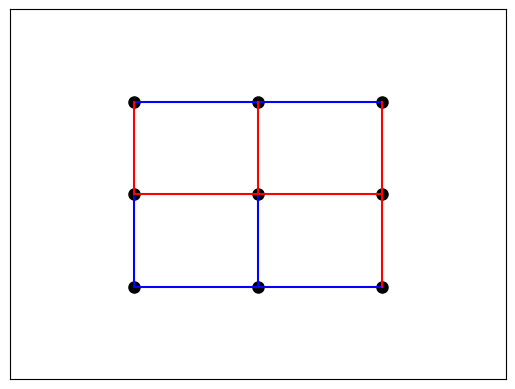

In [15]:


board = Dots_and_Boxes(2, 2)
while not board.is_full():
  p1_move = pick_p1_move(board)
  board.p1_place(p1_move)
  if board.is_full():
    break
  p2_move = pick_p2_move(board)
  board.p2_place(p2_move)

board.print_p1_score()
board.print_p2_score()
board.draw_dots_and_boxes()